# Modeling Motion Detection Using the Reichardt-Hassenstein Detector

Start with a signal e.g. a moving stripe. The general form of a gaussian moving with a speed v is $y(x,t) = exp[-(x - vt)^2]$

In [2]:
import matplotlib.pyplot as plt  
import numpy as np

v0 = 1
sigma0 = 1
dx = 1
dt = 1

def f(x,t,v,sigma):
    return np.exp( -( (x - v*t)**2 ) / (2*sigma**2) )

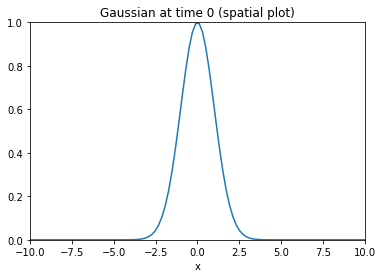

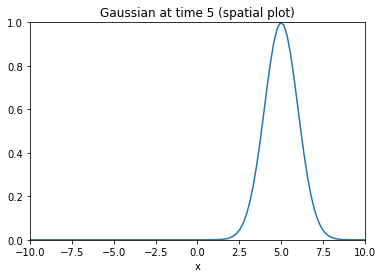

In [3]:
x = np.linspace(-10,10,100)

y = f(x,0,1,1)

plt.plot(x, y)  
plt.xlim([-10, 10])  
plt.ylim([0, 1])  
plt.title('Gaussian at time 0 (spatial plot)')
plt.xlabel('x')
plt.show() 

y = f(x,5,1,1)

plt.plot(x, y)  
plt.xlim([-10, 10])  
plt.ylim([0, 1])  
plt.title('Gaussian at time 5 (spatial plot)')
plt.xlabel('x')
plt.show() 

A detector at $x_1 = 0$ will see a wave of the form 
$y_1(0,t) = y_1(t) = e^{-(vt)^2}$

A detector at $x_2 = \Delta x$ will see a wave of the form 
$y_2(\Delta x, t) = y_2(t) = e^{-(\Delta x - vt)^2}$

In [4]:
def y1(t,v,sigma):
    return f(0,t,v,sigma)

def y2(t,v,sigma):
    return f(dx,t,v,sigma)

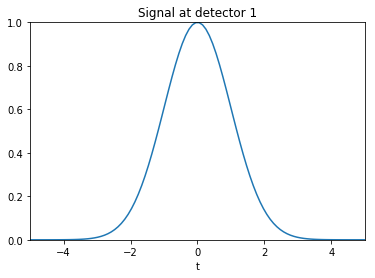

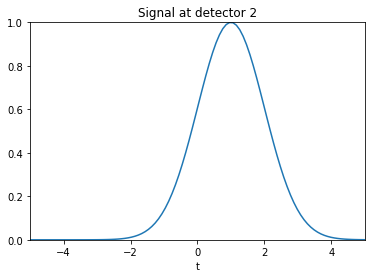

In [5]:
t = np.linspace(-5,5,100)

y = y1(t,v0,sigma0)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 1')
plt.xlabel('t')
plt.show()

y = y2(t,v0,sigma0)
plt.plot(t, y)  
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.title('Signal at detector 2')
plt.xlabel('t')
plt.show() 

The left channel of the RH detector computes $y_1(t-\Delta t) \cdot y_2(t)$

The right channel of the RH detector computes $y_1(t) \cdot y_2(t-\Delta t)$

The RH detector computes the difference of the left and right channels
$y_1(t-\Delta t) \cdot y_2(t) - y_1(t) \cdot y_2(t-\Delta t)$

In [6]:
def left(t, v, sigma):
    return y1(t-dt,v,sigma) * y2(t,v,sigma)

def right(t, v, sigma):
    return y1(t,v,sigma) * y2(t-dt,v,sigma)

def RH(t, v, sigma):
    return left(t, v, sigma) - right(t, v,sigma)

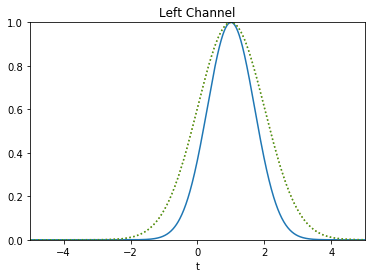

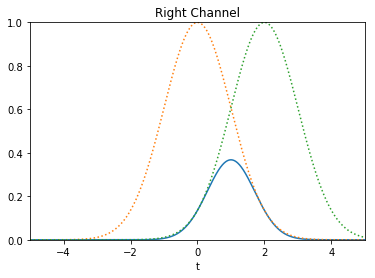

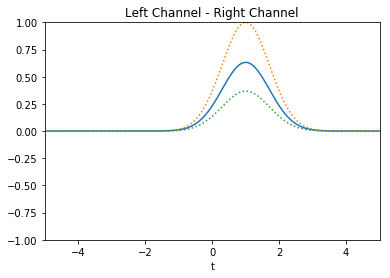

In [7]:
t = np.linspace(-5,5,1000)

plt.plot(t, left(t, v0, sigma0))  
plt.plot(t, y1(t-dt, v0, sigma0), linestyle=':')
plt.plot(t, y2(t, v0, sigma0), linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([0, 1])
plt.xlabel('t')
plt.title('Left Channel')  
plt.show() 


plt.plot(t, right(t, v0, sigma0))  
plt.plot(t, y1(t, v0, sigma0), linestyle=':')  
plt.plot(t, y2(t-dt, v0, sigma0), linestyle=':')
plt.xlim([-5, 5])  
plt.ylim([0, 1])  
plt.xlabel('t')
plt.title('Right Channel')  
plt.show()

plt.plot(t, RH(t, v0, sigma0))
plt.plot(t, left(t, v0, sigma0), linestyle=':')
plt.plot(t, right(t, v0, sigma0), linestyle=':')  
plt.xlim([-5, 5])  
plt.ylim([-1, 1])  
plt.xlabel('t')
plt.title('Left Channel - Right Channel')  
plt.show() 

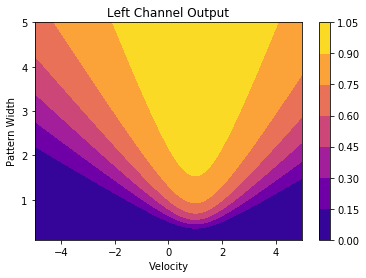

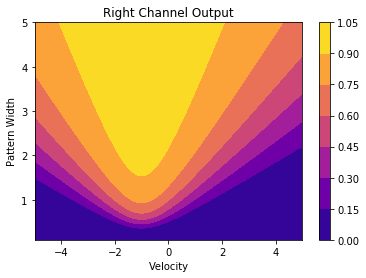

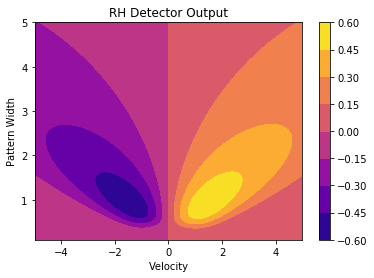

In [9]:
# Implementation of matplotlib function 
import matplotlib.pyplot as plt 
import numpy as np 
  
t = np.linspace(-5, 5, 100)
v = np.linspace(-5, 5, 100) 
sigma = np.linspace(0.1, 5, 100) 

fig, ax = plt.subplots(1, 1) 
output = [[left(0.5, v0, sigma0) for v0 in v] for sigma0 in sigma]
plt.contourf(v, sigma, output, cmap='plasma') 
ax.set_title('Left Channel Output') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Pattern Width') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output = [[right(0.5, v0, sigma0) for v0 in v] for sigma0 in sigma]
plt.contourf(v, sigma, output, cmap='plasma') 
ax.set_title('Right Channel Output') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Pattern Width') 
plt.colorbar()
plt.show() 


fig, ax = plt.subplots(1, 1) 
output = [[RH(0.5, v0, sigma0) for v0 in v] for sigma0 in sigma]
plt.contourf(v, sigma, output, cmap='plasma') 
ax.set_title('RH Detector Output') 
ax.set_xlabel('Velocity') 
ax.set_ylabel('Pattern Width') 
plt.colorbar()
  
plt.show() 

**Takeaways**: 
1. In the RH Detector, the optimum velocity (i.e. velocity at which the detector has the greatest response) depends on the width of the pattern.
2. Meanwhile in the Left or Right Channel detector, the optimum velocity would be v = dx/dt and independent of the width of the pattern.
3. The optimum velocity (i.e. velocity causing the peak response for a given width) of the RH detector increases as the width of the pattern increases
4. The perceived velocity (i.e. analog output of detector) of the RH detector decreases as the width of the pattern increases (assuming an RH detector tuned to the velocity)